## Trabalhando com Feature Scaling

Na aula de hoje, vamos aprender a utilizar na prática  as ferramentas de padronização e normalização!

Vamos utilizar uma base de dados sobre precificação de imóveis com base em características como quantidade de quartos, banheiros, localização, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#Subindo a base de dados
dados = pd.read_csv('data.csv', sep=',')

In [3]:
# Analisando as primeiras linhas
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


No momento de estudar os dados, selecionamos quais podem ser as variáveis chaves para entendermos nossa variével target.

Uma boa correlação das variáveis com nossa variável target pode ser um dos insights do início da construção do modelo.

Vamos dar uma analisada na correlação de nossas variáveis e selecionar algumas delas para aplicar feature scaling.

Nossa variável target no caso seria o preço do imóvel.

## Correlação dos dados:

<ipython-input-4-e0633377d071>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corr().round(2)


<Axes: >

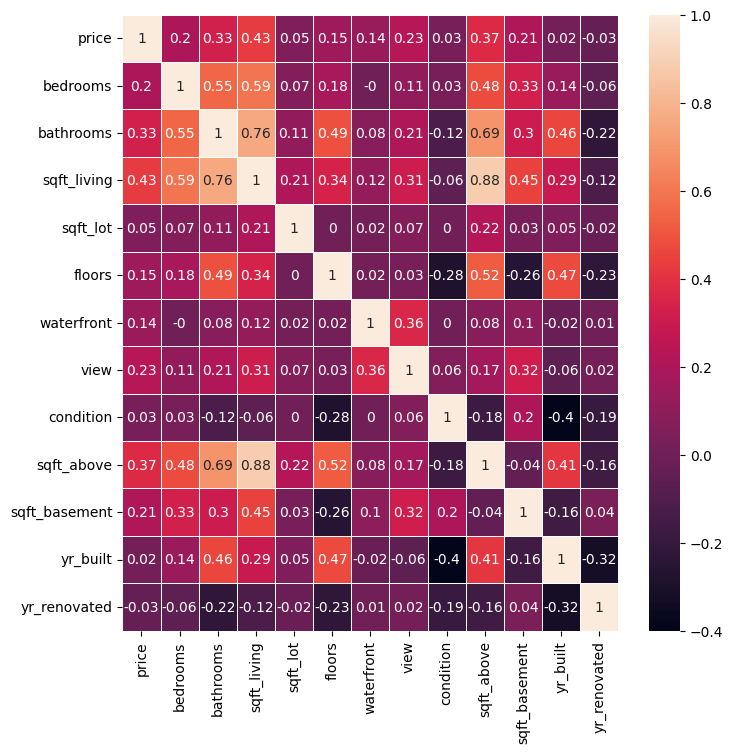

In [4]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Vamos dar uma olhadinha nas variáveis sqft_living e bathrooms pois possuem uma correlação média em relação a variável target.

Vamos separar os dados:

In [5]:
x = dados[["sqft_living", "bathrooms"]].values #variaveis independentes
y = dados["price"].values #target (alvo)

Vamos analisar com um gráfico de dispersão para etender a relação das variáveis independentes com a variável preditora:

<Axes: xlabel='sqft_living', ylabel='price'>

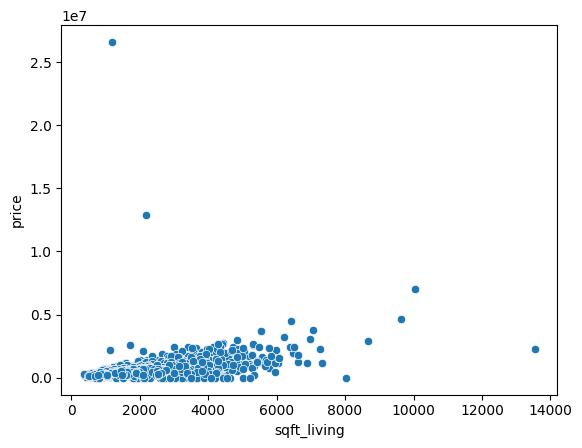

In [6]:
sns.scatterplot(data=dados, x="sqft_living", y="price")

<Axes: xlabel='bathrooms', ylabel='price'>

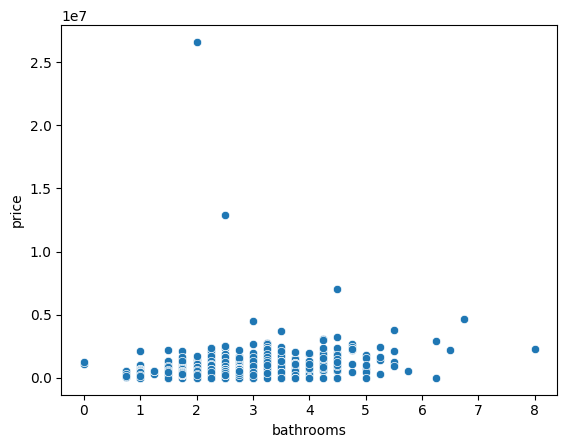

In [7]:
sns.scatterplot(data=dados, x="bathrooms", y="price")

Analisando cada uma das variáveis, perceba que a escala de bathroom é muito menor do que a escala da variável sqft_living.

Vamos colocar em um unico gráfico, as duas variáveis juntas para comparação:

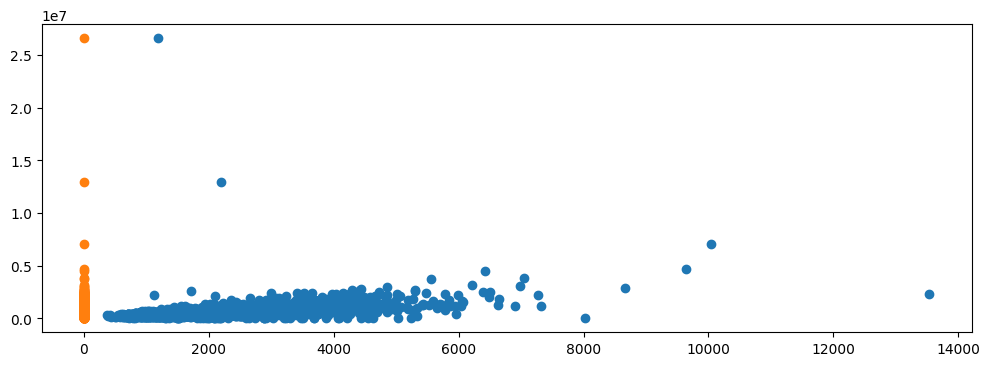

In [8]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(x[:,0], y);
ax.scatter(x[:,1], y);

Analisando a distribuição dos dados com histograma:

<Axes: xlabel='sqft_living', ylabel='Count'>

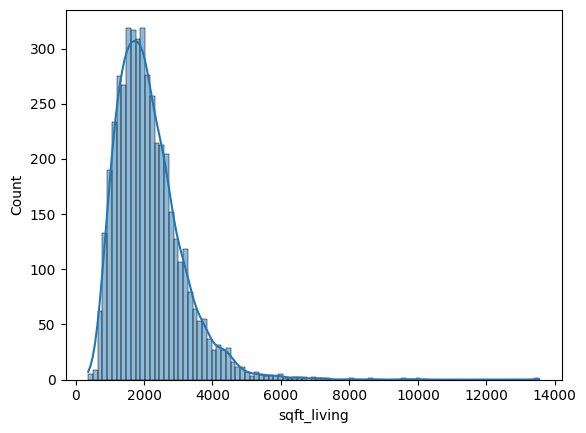

In [9]:
sns.histplot(data=dados, x="sqft_living", kde=True)

<Axes: xlabel='bathrooms', ylabel='Count'>

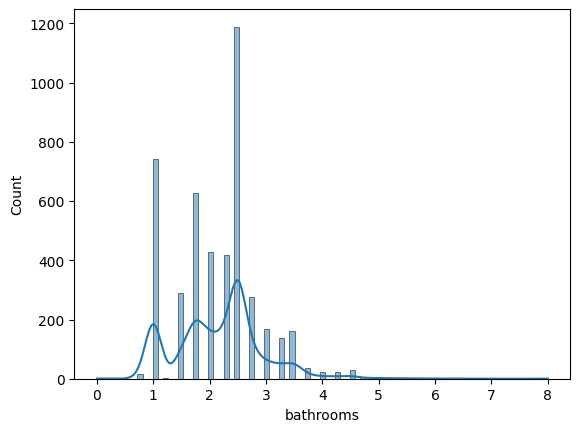

In [10]:
sns.histplot(data=dados, x="bathrooms", kde=True)

Analisando as distribuições em conjunto:

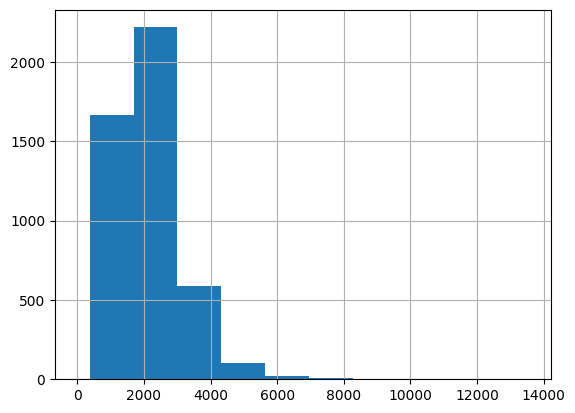

In [11]:
hist_variaveis= pd.DataFrame(dados, columns=["sqft_living", "bathrooms"])

hist_variaveis.sqft_living.hist();
hist_variaveis.bathrooms.hist();

Perceba que trabalhar com variáveis de escalas diferentes pode ser difícil por algumas razões.

As variáveis podem não ser diretamente comparáveis entre si, o que pode dificultar a análise e interpretação dos dados. Além disso, o uso de escalas diferentes pode afetar a precisão e a validade das análises estatísticas realizadas.

Trabalhar com variáveis de escalas diferentes pode ser difícil porque pode afetar a comparabilidade dos dados e a precisão das análises estatísticas realizadas. Para lidar com esse problema, é importante padronizar/normalizar as variáveis na mesma escala antes de realizar as análises.

Vamos criar um escalonador utilizando o StandarScaler.

A padronização coloca a média dos dados em zero e o desvio padrão unitário.

In [12]:
# Criar o escalonador
# Se a questão estatística é respeita, não deve fazer diferença

scaler = StandardScaler() #padronização: média em 0 e desvio padrão unitário

x_std = scaler.fit_transform(x) #transformando para escalar



Analisando as variáveis em conjunto novamente para compreender as escalas padronizadas:

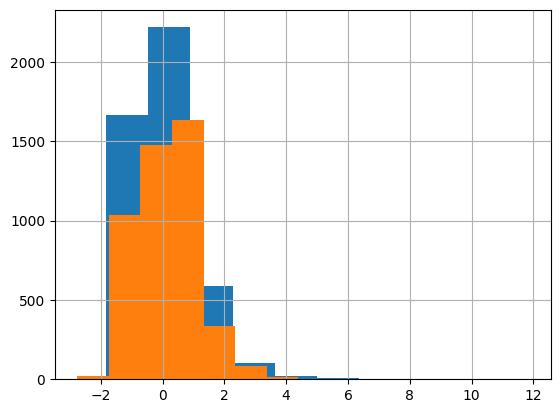

In [13]:
x_std= pd.DataFrame(x_std, columns=["sqft_living", "bathrooms"])

x_std.sqft_living.hist();
x_std.bathrooms.hist();

Perceba que agora nossas escalas estão padronizadas, facilitando assim a construção do modelo!

## Construção do modelo

Vamos realizar testes e comprarar modelos utilizando dados padronizados x não padronizados e entender na prática se existe alguma diferencia:

In [14]:
from sklearn.model_selection import train_test_split                           # Metodologia de separação dos dados
from sklearn.linear_model import LinearRegression                              # Regressão Linear
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Métricas de desempenho

In [15]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"].values

In [16]:
# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 7)

In [17]:
len(x_train) #80%

3450

In [18]:
len(x_test) #20%

1150

Para nosso teste, vamos utilizar o MinMaxScaler.

O MinMaxScaler transforma cada característica em um novo intervalo entre 0 e 1, preservando a relação entre as diferentes características do conjunto de dados. Isso é feito subtraindo o valor mínimo de cada característica e dividindo pela amplitude (diferença entre o valor máximo e mínimo).

In [19]:
#Escalonando os dados
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
x_train

array([[2.400e+03, 3.250e+00],
       [1.954e+03, 2.500e+00],
       [2.620e+03, 2.750e+00],
       ...,
       [3.490e+03, 3.750e+00],
       [2.380e+03, 2.500e+00],
       [1.790e+03, 2.500e+00]])

In [21]:
x_train_scaled

array([[0.15349544, 0.40625   ],
       [0.11960486, 0.3125    ],
       [0.17021277, 0.34375   ],
       ...,
       [0.23632219, 0.46875   ],
       [0.15197568, 0.3125    ],
       [0.10714286, 0.3125    ]])

In [22]:
# Treinando o modelo
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [23]:
# Fazendo as previsões
y_pred = model.predict(x_test_scaled)

In [24]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE',MAE)
print('r²',r2)

MAE 173536.74188212887
r² 0.460589559677016


Modelo sem padronizar os dados:

In [25]:
# Treinando o modelo
model_normal = LinearRegression()

model_normal.fit(x_train, y_train)

LinearRegression()

In [28]:
# Fazendo as previsões
y_pred_normal = model_normal.predict(x_test)

In [29]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)
print('MAE',MAE)
print('r²',r2)

MAE 173536.74188212893
r² 0.4605895596770161
